In [301]:
import pandas as pd

In [302]:
data=pd.read_csv("irrigation_prediction.csv")
data

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,Wheat,Vegetative,Rabi,Rainfed,Reservoir,4.73,Yes,1.98,South,Low
1,Silt,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,Maize,Flowering,Zaid,Canal,Groundwater,12.22,Yes,33.56,Central,Medium
2,Sandy,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,Cotton,Harvest,Rabi,Drip,Reservoir,5.52,Yes,34.62,South,Low
3,Clay,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,Wheat,Sowing,Kharif,Canal,Reservoir,1.43,Yes,84.03,North,Medium
4,Clay,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,Cotton,Sowing,Zaid,Canal,River,2.52,No,60.86,South,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Silt,7.01,26.67,0.86,0.76,27.61,52.20,1075.12,7.41,19.66,Sugarcane,Sowing,Kharif,Drip,Groundwater,2.62,Yes,92.44,South,Low
9996,Clay,5.40,49.44,0.90,1.19,34.03,52.31,1591.84,9.86,5.66,Maize,Sowing,Kharif,Rainfed,Groundwater,4.87,No,15.46,South,Low
9997,Loamy,4.97,60.63,0.99,1.30,36.68,68.16,2384.87,10.75,13.40,Potato,Harvest,Kharif,Canal,Groundwater,10.08,Yes,116.36,North,Low
9998,Loamy,7.12,44.33,1.56,1.08,31.50,64.83,2397.01,4.03,3.05,Sugarcane,Harvest,Kharif,Rainfed,Reservoir,11.11,Yes,118.17,East,Low


### Data Preprocessing

In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Soil_Type                10000 non-null  object 
 1   Soil_pH                  10000 non-null  float64
 2   Soil_Moisture            10000 non-null  float64
 3   Organic_Carbon           10000 non-null  float64
 4   Electrical_Conductivity  10000 non-null  float64
 5   Temperature_C            10000 non-null  float64
 6   Humidity                 10000 non-null  float64
 7   Rainfall_mm              10000 non-null  float64
 8   Sunlight_Hours           10000 non-null  float64
 9   Wind_Speed_kmh           10000 non-null  float64
 10  Crop_Type                10000 non-null  object 
 11  Crop_Growth_Stage        10000 non-null  object 
 12  Season                   10000 non-null  object 
 13  Irrigation_Type          10000 non-null  object 
 14  Water_Source           

In [304]:
data.isnull().sum()

Soil_Type                  0
Soil_pH                    0
Soil_Moisture              0
Organic_Carbon             0
Electrical_Conductivity    0
Temperature_C              0
Humidity                   0
Rainfall_mm                0
Sunlight_Hours             0
Wind_Speed_kmh             0
Crop_Type                  0
Crop_Growth_Stage          0
Season                     0
Irrigation_Type            0
Water_Source               0
Field_Area_hectare         0
Mulching_Used              0
Previous_Irrigation_mm     0
Region                     0
Irrigation_Need            0
dtype: int64

In [305]:
data.duplicated().sum()

np.int64(0)

In [306]:
data = data.drop(
    ['Soil_pH','Organic_Carbon','Electrical_Conductivity','Sunlight_Hours',
     'Wind_Speed_kmh','Irrigation_Type','Water_Source',
     'Field_Area_hectare','Mulching_Used','Region'],axis=1)

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 600x400 with 0 Axes>

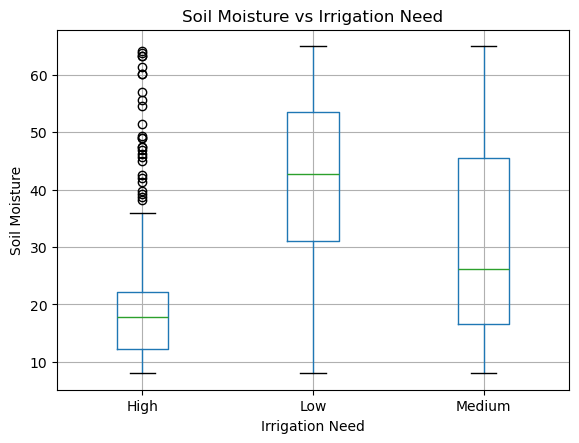

In [308]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
data.boxplot(column='Soil_Moisture', by='Irrigation_Need')
plt.title("Soil Moisture vs Irrigation Need")
plt.suptitle("")
plt.xlabel("Irrigation Need")
plt.ylabel("Soil Moisture")
plt.show()



<Figure size 600x400 with 0 Axes>

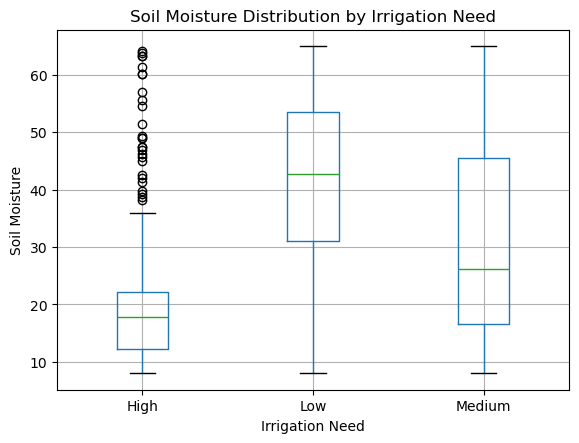

In [309]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
data.boxplot(column='Soil_Moisture', by='Irrigation_Need')
plt.title("Soil Moisture Distribution by Irrigation Need")
plt.suptitle("")
plt.xlabel("Irrigation Need")
plt.ylabel("Soil Moisture")
plt.show()



In [310]:
from sklearn.preprocessing import LabelEncoder

In [311]:
obj1=LabelEncoder()
obj2=LabelEncoder()
obj3=LabelEncoder()
obj4=LabelEncoder()
obj5=LabelEncoder()

In [312]:
data['Soil_Type']=obj1.fit_transform(data['Soil_Type'])
data['Crop_Type']=obj2.fit_transform(data['Crop_Type'])
data["Crop_Growth_Stage"]=obj3.fit_transform(data['Crop_Growth_Stage'])
data['Season']=obj4.fit_transform(data['Season'])
data['Irrigation_Need']=obj5.fit_transform(data['Irrigation_Need'])

In [313]:
data

,Soil_Type,Soil_Moisture,Temperature_C,Humidity,Rainfall_mm,Crop_Type,Crop_Growth_Stage,Season,Previous_Irrigation_mm,Irrigation_Need
0,0,36.48,21.90,31.19,1167.70,5,3,1,1.98,1
1,3,50.56,36.50,26.01,831.28,1,0,2,33.56,2
2,2,40.07,41.83,76.41,1844.45,0,1,1,34.62,1
3,0,12.75,37.22,43.32,306.26,5,2,0,84.03,2
4,0,18.58,22.38,86.44,1875.63,0,2,2,60.86,2
...,...,...,...,...,...,...,...,...,...,...
9995,3,26.67,27.61,52.20,1075.12,4,2,0,92.44,1
9996,0,49.44,34.03,52.31,1591.84,1,2,0,15.46,1
9997,1,60.63,36.68,68.16,2384.87,2,1,0,116.36,1
9998,1,44.33,31.50,64.83,2397.01,4,1,0,118.17,1


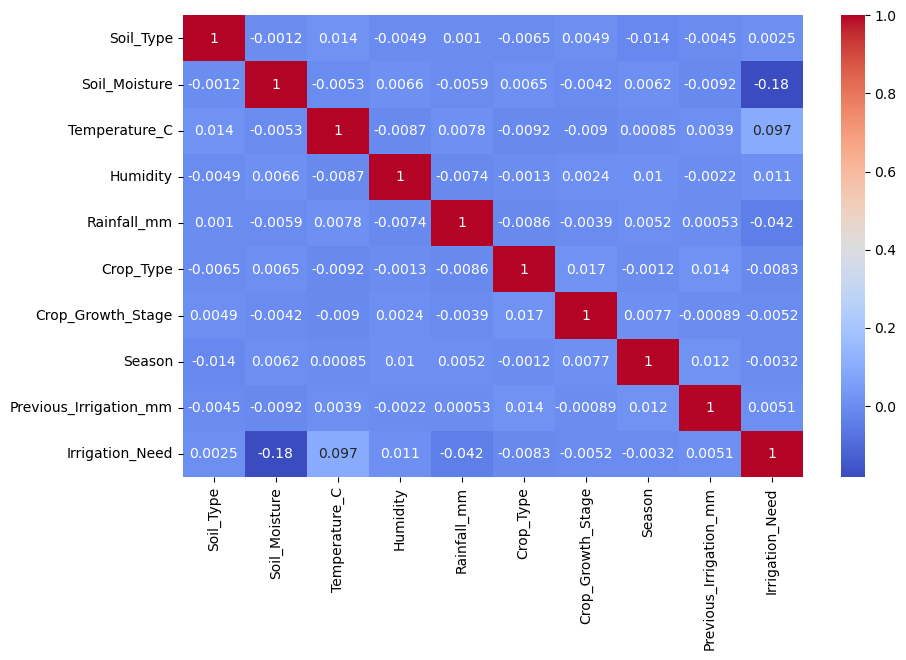

In [314]:
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(['number']).corr(),annot=True,cmap='coolwarm')
plt.show()

In [315]:
x=data.drop(['Irrigation_Need'],axis=1)
y=data['Irrigation_Need']

In [316]:
from sklearn.model_selection import train_test_split

In [317]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [318]:
from sklearn.linear_model import LogisticRegression 

In [319]:
model1=LogisticRegression()

In [320]:
model1.fit(x_train,y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [321]:
y_pred1=model1.predict(x_test)

In [322]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [323]:
accuracy1=accuracy_score(y_test,y_pred1)
accuracy1*100

67.4

In [324]:
classification1 = classification_report(y_test, y_pred1)
print(classification1)

              precision    recall  f1-score   support

           0       0.33      0.08      0.14        59
           1       0.72      0.83      0.77      1204
           2       0.57      0.47      0.52       737

    accuracy                           0.67      2000
   macro avg       0.54      0.46      0.47      2000
weighted avg       0.66      0.67      0.66      2000



In [325]:
from sklearn.tree import DecisionTreeClassifier

In [326]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [327]:
y_pred2=model2.predict(x_test)

In [328]:
accuracy2=accuracy_score(y_test,y_pred2)
accuracy2*100

77.55

In [329]:
classification2 = classification_report(y_test, y_pred2)
print(classification2)

              precision    recall  f1-score   support

           0       0.41      0.42      0.42        59
           1       0.85      0.83      0.84      1204
           2       0.69      0.72      0.70       737

    accuracy                           0.78      2000
   macro avg       0.65      0.66      0.65      2000
weighted avg       0.78      0.78      0.78      2000



In [330]:
from sklearn.ensemble import RandomForestClassifier

In [331]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [332]:
y_pred3=model3.predict(x_test)
accuracy3=accuracy_score(y_test,y_pred3)
accuracy3*100

84.65

In [333]:
classification3 = classification_report(y_test, y_pred3)
print(classification3)

              precision    recall  f1-score   support

           0       0.76      0.37      0.50        59
           1       0.88      0.90      0.89      1204
           2       0.79      0.79      0.79       737

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000



[[  22    0   37]
 [   0 1087  117]
 [   7  146  584]]


<Axes: >

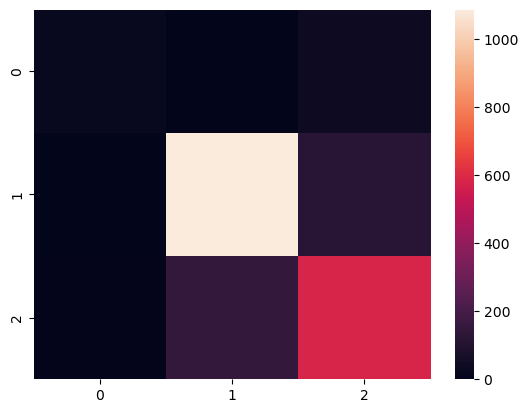

In [334]:
matrix=confusion_matrix(y_test,y_pred3)
print(matrix)
sns.heatmap(matrix)

In [335]:
from sklearn.ensemble import GradientBoostingClassifier

In [336]:
model4=GradientBoostingClassifier()

In [337]:
model4.fit(x_train,y_train)

GradientBoostingClassifier()

In [338]:
y_pred4=model4.predict(x_test)
accuracy4=accuracy_score(y_test,y_pred4)
accuracy4*100

85.3

In [339]:
classification4 = classification_report(y_test, y_pred4)
print(classification4)

              precision    recall  f1-score   support

           0       0.79      0.39      0.52        59
           1       0.88      0.91      0.90      1204
           2       0.80      0.80      0.80       737

    accuracy                           0.85      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.85      0.85      2000



In [340]:
print("LogisticRegression : ",accuracy1*100)
print("DecisionTreeClassifier : ",accuracy2*100)
print("RandomForestClassifier : ",accuracy3*100)
print("GradientBoostingClassifier : ",accuracy4*100)

LogisticRegression :  67.4
DecisionTreeClassifier :  77.55
RandomForestClassifier :  84.65
GradientBoostingClassifier :  85.3


In [341]:
models=pd.DataFrame({'Models': ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier'],
                     'Accuracy score':[accuracy1,accuracy2,accuracy3,accuracy4]})
models.sort_values(by="Accuracy score",ascending=False)

,Models,Accuracy score
3,GradientBoostingClassifier,0.8530
2,RandomForestClassifier,0.8465
1,DecisionTreeClassifier,0.7755
0,LogisticRegression,0.6740


In [368]:
print(obj5.classes_)

['High' 'Low' 'Medium']


In [342]:
data['Soil_Type']=obj1.inverse_transform(data['Soil_Type'])
data['Crop_Type']=obj2.inverse_transform(data['Crop_Type'])
data["Crop_Growth_Stage"]=obj3.inverse_transform(data['Crop_Growth_Stage'])
data['Season']=obj4.inverse_transform(data['Season'])
data['Irrigation_Need']=obj5.inverse_transform(data['Irrigation_Need'])

In [343]:
data

,Soil_Type,Soil_Moisture,Temperature_C,Humidity,Rainfall_mm,Crop_Type,Crop_Growth_Stage,Season,Previous_Irrigation_mm,Irrigation_Need
0,Clay,36.48,21.90,31.19,1167.70,Wheat,Vegetative,Rabi,1.98,Low
1,Silt,50.56,36.50,26.01,831.28,Maize,Flowering,Zaid,33.56,Medium
2,Sandy,40.07,41.83,76.41,1844.45,Cotton,Harvest,Rabi,34.62,Low
3,Clay,12.75,37.22,43.32,306.26,Wheat,Sowing,Kharif,84.03,Medium
4,Clay,18.58,22.38,86.44,1875.63,Cotton,Sowing,Zaid,60.86,Medium
...,...,...,...,...,...,...,...,...,...,...
9995,Silt,26.67,27.61,52.20,1075.12,Sugarcane,Sowing,Kharif,92.44,Low
9996,Clay,49.44,34.03,52.31,1591.84,Maize,Sowing,Kharif,15.46,Low
9997,Loamy,60.63,36.68,68.16,2384.87,Potato,Harvest,Kharif,116.36,Low
9998,Loamy,44.33,31.50,64.83,2397.01,Sugarcane,Harvest,Kharif,118.17,Low


In [344]:
!pip install gradio

In [345]:
import gradio as gr

In [375]:
feature_columns = [
    "Soil_Type",
    "Soil_Moisture",
    "Temperature_C",
    "Humidity",
    "Rainfall_mm",
    "Crop_Type",
    "Crop_Growth_Stage",
    "Season",
    "Previous_Irrigation_mm"
]


In [376]:
def predict_irrigation(
    Soil_Type, Soil_Moisture, Temperature_C, Humidity,
    Rainfall_mm, Crop_Type, Crop_Growth_Stage,
    Season, Previous_Irrigation_mm
):
    input_data = pd.DataFrame([[ 
        Soil_Type,
        Soil_Moisture,
        Temperature_C,
        Humidity,
        Rainfall_mm,
        Crop_Type,
        Crop_Growth_Stage,
        Season,
        Previous_Irrigation_mm
    ]], columns=feature_columns)

    input_data['Soil_Type'] = obj1.transform(input_data['Soil_Type'])
    input_data['Crop_Type'] = obj2.transform(input_data['Crop_Type'])
    input_data['Crop_Growth_Stage'] = obj3.transform(input_data['Crop_Growth_Stage'])
    input_data['Season'] = obj4.transform(input_data['Season'])

    prediction = model4.predict(input_data)
    
    return (prediction)[0]




In [378]:
interface = gr.Interface(
    fn=predict_irrigation,
    inputs=[
        gr.Dropdown(["Clay", "Sandy", "Loamy", "Silt"], label="Soil Type"),
        gr.Slider(0, 100, label="Soil Moisture (%)"),
        gr.Number(label="Temperature (°C)"),
        gr.Number(label="Humidity"),
        gr.Number(label="Rainfall (mm)"),
        gr.Dropdown(["Wheat", "Maize", "Cotton", "Sugarcane", "Potato"], label="Crop Type"),
        gr.Dropdown(["Sowing", "Vegetative", "Flowering", "Harvest"], label="Crop Growth Stage"),
        gr.Dropdown(["Kharif", "Rabi", "Zaid"], label="Season"),
        gr.Number(label="Previous Irrigation (mm)")
    ],
    outputs=gr.Textbox(label="Predicted Irrigation Need"),
    
    title="🌱 Smart Irrigation Prediction System",
    description="Predict irrigation requirement using Machine Learning"
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7882
* To create a public link, set `share=True` in `launch()`.
